<a href="https://colab.research.google.com/github/panda1835/youtube-hunting/blob/main/04-Data-Analysis/02_video-metadata-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# download utilized scripts
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/04-Data-Analysis/src/data_analysis_utils.py
!wget https://raw.githubusercontent.com/panda1835/youtube-hunting/main/Utils/utils.py

--2021-12-31 08:40:32--  https://raw.githubusercontent.com/panda1835/youtube-hunting/main/04-Data-Analysis/src/data_analysis_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘data_analysis_utils.py’

data_analysis_utils 100%[===================>]   1.23K  --.-KB/s    in 0s      

2021-12-31 08:40:32 (85.7 MB/s) - ‘data_analysis_utils.py’ saved [1258/1258]



In [25]:
import pandas as pd
import numpy as np
import json 
import os
from tqdm import tqdm
import importlib
from time import sleep 

import matplotlib.pyplot as plt

from google.colab import data_table

# import utilized scripts
import data_analysis_utils as dautils
import utils as utils

In [ ]:
importlib.reload(dcutils)
importlib.reload(utils)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
root = "/content/drive/My Drive/Let-Hunt-Youtube/"
config_file_path = os.path.join(root, 'config.json')

config = json.load(open(config_file_path))

database_save_folder = config['folder']['database']
visualization_save_folder = config['folder']['data-analysis']
visualization_metadata_save_folder = config['folder']['data-analysis-metadata']

video_url_50_db_file_name = config['database']['video_url_50']
video_url_50_anno_db_file_name = config['database']['video_url_50_annotation']

video_url_50_file_path = os.path.join(root, database_save_folder, video_url_50_db_file_name)
video_url_50_anno_db_file_path = os.path.join(root, database_save_folder, video_url_50_anno_db_file_name)
visualization_folder_path = os.path.join(root, visualization_save_folder, visualization_metadata_save_folder)

In [6]:
# read db
video_df = pd.read_csv(video_url_50_file_path)
video_anno_df = pd.read_csv(video_url_50_anno_db_file_path)

In [16]:
# create a join dataframe
join_df = video_anno_df.join(video_df, lsuffix='', rsuffix='other')
assert join_df.video_url.to_list() == join_df.video_url_other.to_list(), print("Unmatched id")
join_df.sample()

,video_url,comment_sheet_name,seller_showcase_only,seller_showcase_with_dead_animal,seller_demo_no_killing,seller_demo_has_killing,non_seller_has_killing,non_seller_no_killing,rifle_type,accessories,Note,video_urlother,added_date,search_query,video_file_name,channel_name,channel_url,extracted_date,video_id,comment_sheet_nameother,comment_added_date,video_name,id,video_url_other,channel_id,channel_name_other,video_file_name_other,video_description,num_like,num_dislike,num_view,published_time,tags,video_topic_category,duration,projection,definition,thumbnail_default,thumbnail_medium,thumbnail_high,thumbnail_standard,last_update
8,https://www.youtube.com/watch?v=xcV48yV7Dvk,video00009,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,https://www.youtube.com/watch?v=xcV48yV7Dvk,2021-12-22 09:30:38,channel: Thú Vui Hái Lượm,NaN,Thú Vui Hái Lượm,https://www.youtube.com/channel/UChtmfWyYkhjvS...,NaN,xcV48yV7Dvk,video00009,2021-12-22 11:26:55,Hunting With PCP And Light Entertainment😋😋😋. R...,xcV48yV7Dvk,https://www.youtube.com/watch?v=xcV48yV7Dvk,UChtmfWyYkhjvS5_pbEFs6Rw,Thú Vui Hái Lượm,NaN,ThúVuiHáiLượm# săn bắn# bấy thu,17,NaN,1508,2020-02-05T15:14:01Z,"sănbắn, sănthú, súngpcp, sungsan, bấythú, bấyc...","https://en.wikipedia.org/wiki/Hobby, https://e...",PT5M12S,rectangular,hd,https://i.ytimg.com/vi/xcV48yV7Dvk/default.jpg,https://i.ytimg.com/vi/xcV48yV7Dvk/mqdefault.jpg,https://i.ytimg.com/vi/xcV48yV7Dvk/hqdefault.jpg,https://i.ytimg.com/vi/xcV48yV7Dvk/sddefault.jpg,2021-12-31 15:28:45


In [19]:
# clean
# drop unnecessary column

# convert to date-time
join_df['published_time']=pd.to_datetime(join_df['published_time'])

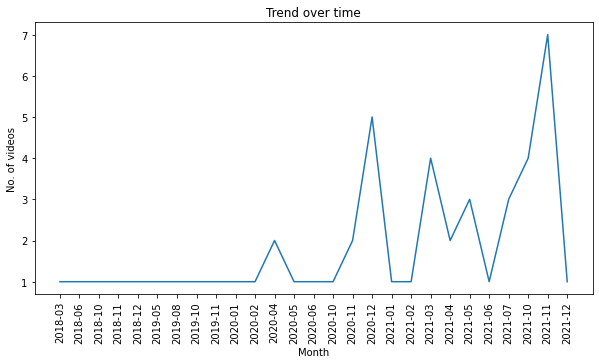

File is saved to trend-over-time.jpg in Google Drive at /content/drive/My Drive/Let-Hunt-Youtube/Data-Analysis/Metadata/trend-over-time.jpg


<Figure size 432x288 with 0 Axes>

In [45]:
# trend over time
plt.figure(figsize=(10, 5))
a = join_df.groupby(join_df['published_time'].dt.strftime('%Y-%m'))['video_url'].count()
x = a.index
plt.plot(x, a[x])
plt.xticks(rotation=90)
plt.title("Trend over time")
plt.xlabel('Month')
plt.ylabel('No. of videos')
plt.show()
utils.save_image(plt, visualization_folder_path, "trend-over-time.jpg")